# Lecture 15 Predicting Numerical Values: Getting Started with Regression (Part I)

## 15.1 Setup

In [31]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

%matplotlib inline 

When you include this command (%matplotlib inline) at the beginning of a Jupyter notebook cell and then create a Matplotlib plot, the plot will be displayed directly in the notebook cell, typically right below the code that generated it.

In [32]:
from sklearn import (datasets,
                     linear_model,
                     metrics,
                     model_selection as skms,
                     neighbors)

In [33]:
import warnings
warnings.filterwarnings('ignore')
np.random.seed(42)

In [4]:
pd.options.display.float_format = '{:20,.4f}'.format

## 15.2 Diabetes Dataset

### A Simple Regression Dataset

Regression is the process of predicting a finely graded numerical value from inputs. 

To illustrate, we need a simple dataset that has numerical results. sklearn comes with the diabetes dataset that will serve us nicely. 

The dataset consists of several biometric and demographic measurements. The version included with sklearn has been modified from raw numerical features by subtracting the mean and dividing by the standard deviation of each column. That process is called standardizing or z-scoring the features. We’ll return to the standard deviation later; briefly, it is a measure of how spread out a set of values are.

The net result of standardizing the columns is that each column has a mean of 0 and a standard deviation of 1. 

We standardize, or otherwise rescale, the data so that differences in feature ranges—heights within 50–100 inches or incomes from $20,000 to $200,000—don’t incur undo weight penalties or benefits just from their scale. We’ll discuss standardization and scaling more in Section 10.3. The categorical values in diabetes were recorded numerically as {0, 1} and then standardized. I mention it to explain why there are negative ages (the mean age is zero after standardizing) and why the sexes are coded, or recorded, as {0.0507, –0.0446} instead of {M, F}.


In [34]:
diabetes = datasets.load_diabetes()

In [35]:
tts = skms.train_test_split(diabetes.data,
                            diabetes.target,
                            test_size=.25)

(diabetes_train_ftrs, diabetes_test_ftrs,
 diabetes_train_tgt,  diabetes_test_tgt) = tts

>'skms' is assumed to be an alias for scikit-learn's model_selection module, often imported as sklearn.model_selection. This module contains functions for various aspects of model selection and data splitting.

>train_test_split is a function from scikit-learn that is used to split a dataset into training and testing sets. It takes the following arguments:

    diabetes.data: This is assumed to be the feature data of the dataset. It should contain the input variables for your machine learning model.
    
    diabetes.target: This is assumed to be the target data or labels of the dataset. It should contain the output or target variable you want to predict.
    
    test_size: This parameter specifies the fraction of the dataset to include in the testing split. In this case, it's set to 25%, meaning 25% of the data will be used for testing, and the remaining 75% will be used for training.
    
    The train_test_split function returns a tuple, and you've assigned the result to tts.

In [7]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

>The print(diabetes.DESCR) statement is used to display the description of the Diabetes dataset in scikit-learn (sklearn). This description provides information about the dataset, its source, and the meaning of the features and target variable.

We can dress the dataset up with a DataFrame and look at the first few rows:

In [36]:
diabetes_df = pd.DataFrame(diabetes.data,
                           columns=diabetes.feature_names)
diabetes_df['target'] = diabetes.target
diabetes_df.head()

age                  sex                  bmi  \
0               0.0381               0.0507               0.0617   
1              -0.0019              -0.0446              -0.0515   
2               0.0853               0.0507               0.0445   
3              -0.0891              -0.0446              -0.0116   
4               0.0054              -0.0446              -0.0364   

                    bp                   s1                   s2  \
0               0.0219              -0.0442              -0.0348   
1              -0.0263              -0.0084              -0.0192   
2              -0.0057              -0.0456              -0.0342   
3              -0.0367               0.0122               0.0250   
4               0.0219               0.0039               0.0156   

                    s3                   s4                   s5  \
0              -0.0434              -0.0026               0.0199   
1               0.0744              -0.0395              -0.0683   
2              -0.0324              -0.0026               0.0029   
3              -0.0360               0.0343               0.0227   
4               0.0081              -0.0026              -0.0320   

                    s6               target  
0              -0.0176             151.0000  
1              -0.0922              75.0000  
2              -0.0259             141.0000  
3              -0.0094             206.0000  
4              -0.0466             135.0000

Aside from the ***odd values for seemingly categorical measures like age and sex***, two of the other columns are quickly explainable; the rest are more specialized and somewhat underspecified:

>bmi is the body mass index, computed from height and weight, which is an approximation of body-fat percentage,

>bp is the blood pressure,

>s1–s6 are six blood serum measurements, and

>target is a numerical score measuring the progression of a patient’s illness.



In [37]:
diabetes_df.describe()

age                  sex                  bmi  \
count             442.0000             442.0000             442.0000   
mean               -0.0000               0.0000              -0.0000   
std                 0.0476               0.0476               0.0476   
min                -0.1072              -0.0446              -0.0903   
25%                -0.0373              -0.0446              -0.0342   
50%                 0.0054              -0.0446              -0.0073   
75%                 0.0381               0.0507               0.0312   
max                 0.1107               0.0507               0.1706   

                        bp                   s1                   s2  \
count             442.0000             442.0000             442.0000   
mean                0.0000              -0.0000               0.0000   
std                 0.0476               0.0476               0.0476   
min                -0.1124              -0.1268              -0.1156   
25%                -0.0367              -0.0342              -0.0304   
50%                -0.0057              -0.0043              -0.0038   
75%                 0.0356               0.0284               0.0298   
max                 0.1320               0.1539               0.1988   

                        s3                   s4                   s5  \
count             442.0000             442.0000             442.0000   
mean               -0.0000               0.0000              -0.0000   
std                 0.0476               0.0476               0.0476   
min                -0.1023              -0.0764              -0.1261   
25%                -0.0351              -0.0395              -0.0332   
50%                -0.0066              -0.0026              -0.0019   
75%                 0.0293               0.0343               0.0324   
max                 0.1812               0.1852               0.1336   

                        s6               target  
count             442.0000             442.0000  
mean               -0.0000             152.1335  
std                 0.0476              77.0930  
min                -0.1378              25.0000  
25%                -0.0332              87.0000  
50%                -0.0011             140.5000  
75%                 0.0279             211.5000  
max                 0.1356             346.0000

As we did with the iris data, we can investigate the bivariate relationships with Seaborn’s pairplot. We’ll keep just a subset of the measurements for this graphic. The resulting mini-plots are still fairly small, but we can still glance through them and look for overall patterns. We can always redo the pairplot with all the features if we want to zoom out for a more global view.

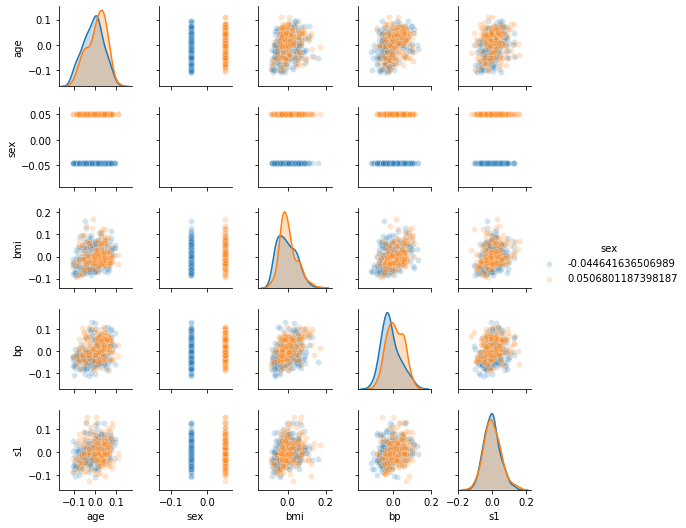

In [12]:
sns.pairplot(diabetes_df[['age', 'sex', 'bmi', 'bp', 's1']],
             height=1.5, 
             hue='sex', 
             plot_kws={'alpha':.2});

## 15.3  Measures of Center: Median & Mean

The median of a group of numbers is the middle number when that group is written in order. 

For example, if I have three numbers, listed in order as [1, 8, 10], then 8 is the middle value: there is one number above it and one below. 

Within a group of numbers, the median has the same count of values below it and above it. To put it another way, if all the numbers have equal weight, regardless of their numerical value, then a scale placed at the median would be balanced. Regardless of the biggest value on the right—be it 15 or 40—the median stays the same.

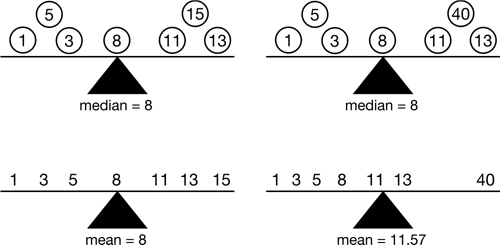

You might be wondering what to do when we have an even number of values, say [1, 2, 3, 4]. The usual way to construct the median is to take the middle two values—the 2 and 3—and take their average, which gives us 2.5. Note that there are still the same number of values, two, above and below this median.

In [8]:
values = np.array([1, 3, 5, 8, 11, 13, 15])
print("no outlier")
print(np.mean(values),
      np.median(values))

values_with_outlier = np.array([1, 3, 5, 8, 11, 13, 40])
print("with outlier")
print("%5.2f" % np.mean(values_with_outlier),
      np.median(values_with_outlier))

no outlier
8.0 8.0
with outlier
11.57 8.0


In [13]:
rolls = np.array([1,6,6,6,2,3,4,3,1])
np.mean(rolls)

3.5555555555555554

In [14]:
np.median(rolls)

3.0

In [15]:
mistake_rolls = np.array([1,6,6,16,2,3,4,3,1])
np.mean(mistake_rolls)

4.666666666666667

In [16]:
np.median(mistake_rolls)

3.0

Now, there are scenarios where we care about the actual numbers, not just their in-order positions. 

The other familiar way of estimating the center is the mean. 

Whereas the median balances the count of values to the left and right, the mean balances the total distances to the left and right. So, the mean is the value for which sum(distance(s,mean) for s in smaller) is equal to sum(distance(b,mean) for b in bigger). The only value that meets this constraint is mean=sum(d)/len(d). 

In [17]:
values = np.array([5,7,9])
np.mean(values)

7.0

Beyond the mean and median, there are many possible ways to combine the **nearest-neighbor** answers into an answer for a test example. 

One combiner that builds on the idea of the mean is a **weighted mean**. In the nearest-neighbor context, we have a perfect candidate to serve as the weighting factor: the distance from our new example to the neighbor. So, instead of neighbors contributing just their values [4.0, 6.0, 8.0], we can also incorporate the distance from each neighbor to our example. Let’s say those distances are [2.0, 4.0, 4.0], i.e. the second and third training examples are twice as far from our test example as the first one. A simple way to incorporate the distance is to compute a weighted average using

In [9]:
distances = np.array([2.0, 4.0, 4.0])
closeness = 1.0 / distances             # element-by-element division
weights = closeness / np.sum(closeness) # normalize sum to one
weights

array([0.5 , 0.25, 0.25])

In [10]:
values = np.array([4, 6, 8])

mean = np.mean(values)
wgt_mean = np.dot(values, weights)

print("Mean:", mean)
print("Weighted Mean:", wgt_mean)

Mean: 6.0
Weighted Mean: 5.5


In [11]:
wgt = np.array([.5, .25, .25])
np.dot(wgt, values)

5.5

In [12]:
wgt = np.array([1/3, 1/3, 1/3])
np.dot(wgt, values)

6.0

## 15.4 Building a k-NN Regression Model

Building a k-Nearest Neighbors (k-NN) regression model involves several steps. k-NN regression is a type of supervised learning algorithm used for predicting a continuous target variable. Here's a step-by-step guide on how to build a k-NN regression model:

 1. **Data Preparation**:
   - Load and preprocess your dataset. Make sure you have the feature variables and the target variable ready.
   - Split your dataset into training and testing sets. The training set will be used to train the model, and the testing set will be used to evaluate its performance.



2. **Choose the Number of Neighbors (k)**:
   - Decide on the value of `k`, which is the number of nearest neighbors to consider when making predictions. You may need to experiment with different values of `k` to find the one that provides the best performance on your dataset. Common choices include odd numbers like 3, 5, or 7.


In [14]:
k = 3

3. **Train the k-NN Regression Model**:
   - Using the training data, fit the k-NN regression model to your data. This involves storing the training data in a data structure that allows for efficient nearest neighbor searches during prediction.

In [38]:
# from sklearn.neighbors import KNeighborsRegressor
## Create the k-NN regression model
knn = neighbors.KNeighborsRegressor(n_neighbors=k)

# Train the model on the training data
fit = knn.fit(diabetes_train_ftrs, diabetes_train_tgt)

4. **Make Predictions**:

   - Use the trained model to make predictions on the testing data.


In [18]:
preds = knn.predict(diabetes_test_ftrs)

5. **Evaluate the Model**:
   - Evaluate the performance of the k-NN regression model using appropriate regression evaluation metrics. Common metrics include Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and R-squared (R²).


In [23]:
#from sklearn.metrics import mean_squared_error, r2_score

mse = metrics.mean_squared_error(diabetes_test_tgt, preds)
print(f"Mean Squared Error: {mse:.2f}")


Mean Squared Error: 3471.42


In [24]:
r2 = metrics.r2_score(diabetes_test_tgt, preds)
print(f"R-squared (R²): {r2:.2f}")

R-squared (R²): 0.37


In [27]:
# Calculate Mean Absolute Error (MAE)
mae = metrics.mean_absolute_error(diabetes_test_tgt, preds)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(metrics.mean_squared_error(diabetes_test_tgt, preds))

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

Mean Absolute Error (MAE): 44.62
Root Mean Squared Error (RMSE): 58.92


6. **Tune Hyperparameters**:
   - If the model's performance is not satisfactory, you may need to fine-tune hyperparameters such as `k` and the choice of distance metric.


Remember that k-NN regression is a simple and interpretable model, but its performance can be sensitive to the choice of `k` and the distance metric. Experimentation and careful hyperparameter tuning are often necessary to get the best results for your specific problem.

In [43]:
np.sqrt(3471.42)

58.9187576243763

Now, let’s look at the range of values that the target can take:

In [42]:
diabetes_df['target'].max() - diabetes_df['target'].min() 

321.0

So, the target values span about 300 units and our predictions are off—in some average sense—by 60 units. That’s around 20%. Whether or not that is “good enough” depends on many other factors which we will discuss later.

>We built a KNeighborsRegressor model.

>We used mean_squared_error, r2,  and mean_absolute_error metrics.

## 15.5 Linear Regression

We’re going to dive into linear regression (LR)—which is just a fancy name for drawing a straight line through a set of data points. 

LR has a long history throughout math and science. You may have been exposed to it before. You may have seen LR in an algebra or statistics class. Here’s a very different presentation.

Do you like to draw? Take a pen and draw a bunch of dots on a piece of paper. Now, draw a single straight line through the dots. You might have encountered a problem already. If there were more than two dots, there are many, many different lines you could potentially draw. The idea of drawing a line through the dots gets a general idea across, but it doesn’t give us a reproducible way of specifying or completing the task.

One way of picking a specific line through the dots is to say we want a best line — problem solved. I want the line that stays closest to the dots based on the vertical distance from the dots to the line. Now we’re getting somewhere. We have something we can calculate to compare different alternatives.

Which line is best under that criteria? 

Let me start by simplifying a little bit. Imagine we can only draw lines that are parallel to the bottom of the piece of paper. You can think about moving the line like raising or lowering an Olympic high-jump bar: it stays parallel to the ground. 

If I start sliding the line up and down, I’m going to start far away from all the points, move close to some points, slide onwards to a great, just-right middle ground, move close to other points, and finally end up far away from everything. Yes, the idea of a happy medium—too hot, too cold, and just right—applies here. We’ll see this example in code and graphics in just a moment. At the risk of becoming too abstract too quickly, we are limited to drawing lines like y = c. In English, that means the height of our bar is always equal to some constant, fixed value.

In [44]:
def axis_helper(ax, lims):
    'clean up axes'
    ax.set_xlim(lims); ax.set_xticks([])
    ax.set_ylim(lims); ax.set_yticks([])
    ax.set_aspect('equal')

In [45]:
def process(D, model, ax):
    x,y = D[:,0], D[:,1]
    m,b = model   # y=mx+b
    
    axis_helper(ax, (0,8))
    
    # draws the data
    ax.plot(x,y,'ro')
    
    # drawing the line
    helper_xs   = np.array([0,8])
    helper_line = m * helper_xs + b  # y=mx+b
    ax.plot(helper_xs, helper_line, color='y')
    
    # calculate the errors
    predictions = m * x + b
    errors = y - predictions
    
    # plot errors
    ax.vlines(x, predictions, y)
    
    # return the results
    sse = np.dot(errors, errors)  # sum-of-squared-errors
    return (errors, errors.sum(), sse, np.sqrt(sse))


In [46]:
D = np.array([[3,5],
              [4,2]])

# very simple horizontal lines
# y=mx+b .... m is 0, line is horizontal
bs = np.array([1,2,3,3.5,4,5])
horizontal_lines = np.c_[np.zeros_like(bs),
                         bs]
horizontal_lines

array([[0. , 1. ],
       [0. , 2. ],
       [0. , 3. ],
       [0. , 3.5],
       [0. , 4. ],
       [0. , 5. ]])

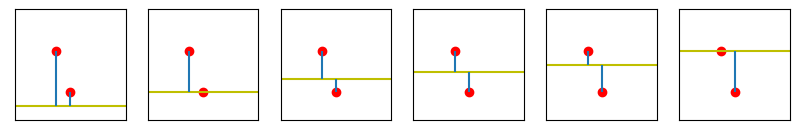

In [47]:
col_labels = ['Raw Errors', 'Sum', 'SSE', 'TotalDist']
fig, axes = plt.subplots(1,6,figsize=(10,5))
records = [process(D, mod, ax) for mod, ax in zip(horizontal_lines, 
                                                 axes.flat)]
df = pd.DataFrame.from_records(records, columns=col_labels)

In [48]:
df

Raw Errors                  Sum                  SSE            TotalDist
0   [4.0, 1.0]               5.0000              17.0000               4.1231
1   [3.0, 0.0]               3.0000               9.0000               3.0000
2  [2.0, -1.0]               1.0000               5.0000               2.2361
3  [1.5, -1.5]               0.0000               4.5000               2.1213
4  [1.0, -2.0]              -1.0000               5.0000               2.2361
5  [0.0, -3.0]              -3.0000               9.0000               3.0000

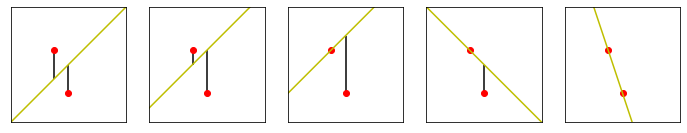

In [35]:
lines_mb = np.array([[ 1, 0],
                     [ 1, 1],
                     [ 1, 2],
                     [-1, 8],
                     [-3,14]])

fig, axes = plt.subplots(1,5,figsize=(12,6))
records = [process(D, mod, ax) for mod, ax in zip(lines_mb, 
                                                  axes.flat)]
df = pd.DataFrame.from_records(records, columns=col_labels)

In [51]:
lr = linear_model.LinearRegression()
fit = lr.fit(diabetes_train_ftrs, diabetes_train_tgt)
preds = fit.predict(diabetes_test_ftrs)


In [52]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


mae = mean_absolute_error(diabetes_test_tgt, preds)
mse = mean_squared_error(diabetes_test_tgt, preds)
rmse = np.sqrt(mse)
r2 = r2_score(diabetes_test_tgt, preds)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R²): {r2:.2f}")


Mean Absolute Error (MAE): 41.55
Mean Squared Error (MSE): 2848.30
Root Mean Squared Error (RMSE): 53.37
R-squared (R²): 0.48
